In [1]:
import pandas as pd
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
# from nilearn import image
# import ants
from datetime import datetime, timedelta
# import pydicom as dicom
from glob import glob
import pickle
import matplotlib.image as mpimg
from collections import defaultdict, Counter
from scipy import stats

# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ztnhy2jz because the default path (/gpfs/home/lc3424/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [26]:
os.chdir('/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/code')

t1_flair_file = pd.read_csv('t1_flair_file_match_with_reg.tsv', sep='\t')
temp = t1_flair_file.loc[2835, ['flair_path', 't1_path', 'flair_registered_file_path']]
flair, t1, flair_reg = temp.flair_path, temp.t1_path, temp.flair_registered_file_path

In [24]:
t1_flair_file

,Session,flair_path,Subject,scan_date_time,Label,t1_path,flair_registered_file_path
0,642974572045,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,91b21976a74d4ca1bd68802fddaf0773,2018-05-15 09:45:00,1.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
1,606661809808,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,3eeb7c170c0c4b14a891b414df82af53,2016-04-19 14:07:00,1.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
2,606661809808,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,3eeb7c170c0c4b14a891b414df82af53,2016-04-19 14:07:00,1.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
3,606661809808,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,3eeb7c170c0c4b14a891b414df82af53,2016-04-19 14:07:00,1.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
4,606661809808,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,3eeb7c170c0c4b14a891b414df82af53,2016-04-19 14:07:00,1.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
...,...,...,...,...,...,...,...
2834,135396913182,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,a1ea33913ddd4759988aab413bbe1232,2018-07-16 19:03:00,0.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
2835,905719790534,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,797427b0f85a44a9994d1967c2bed70a,2015-02-27 09:35:00,2.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
2836,905719790534,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,797427b0f85a44a9994d1967c2bed70a,2015-02-27 09:35:00,2.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
2837,100039817943,/gpfs/data/razavianlab/data/mri/nyu/barlow_nii...,210909b9725245c5a09e052b931447f4,2016-03-17 10:19:00,0.0,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,/gpfs/data/razavianlab/data/mri/nyu/barlow_fla...


In [25]:
t1_flair_file.loc[2835, :]

Session                                                            905719790534
flair_path                    /gpfs/data/razavianlab/data/mri/nyu/barlow_nii...
Subject                                        797427b0f85a44a9994d1967c2bed70a
scan_date_time                                              2015-02-27 09:35:00
Label                                                                       2.0
t1_path                       /gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
flair_registered_file_path    /gpfs/data/razavianlab/data/mri/nyu/barlow_fla...
Name: 2835, dtype: object

(121, 145, 121)


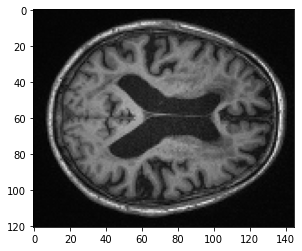

In [31]:
# t1 originial
file = nib.load(t1)
img = file.get_fdata()
print(img.shape)
plt.savefig('AD_example_t1.png')
plt.imshow(img[:,:,60], cmap='gray')

(260, 320, 30)


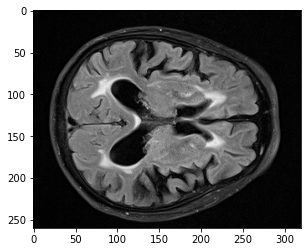

In [30]:
# flair original

file = nib.load(flair)
img = file.get_fdata()
print(img.shape)
plt.savefig('AD_example_flair.png')
plt.imshow(img[:,:,15], cmap='gray')

(416, 512, 33)


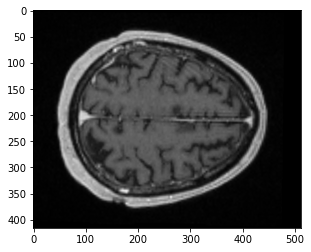

In [6]:
# flair registered

file = nib.load(flair_reg)
img = file.get_fdata()
print(img.shape)
plt.imshow(img[:,:,25], cmap='gray')

(260, 320, 30)


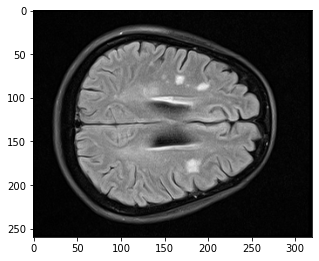

In [2]:
plt.figure(figsize=(5, 5))
file_name = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/code/temp/flair_reorient.nii.gz'
file = nib.load(file_name)
img = file.get_fdata()
print(img.shape)
plt.imshow(img[:,:,20], cmap='gray')


(121, 145, 121)


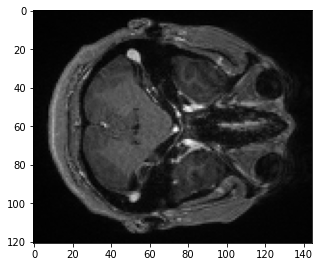

In [3]:
plt.figure(figsize=(5, 5))
file_name = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/code/temp/t1_reorient.nii.gz'
file = nib.load(file_name)
img = file.get_fdata()
print(img.shape)
plt.imshow(img[:,:,20], cmap='gray')


(300, 320, 40)


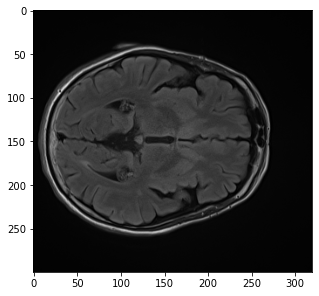

In [6]:
plt.figure(figsize=(5, 5))
file_name = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/code/temp/flair_reorient.nii.gz'
file = nib.load(file_name)
img = file.get_fdata()
print(img.shape)
plt.imshow(img[:,:,20], cmap='gray')


(121, 145, 121)


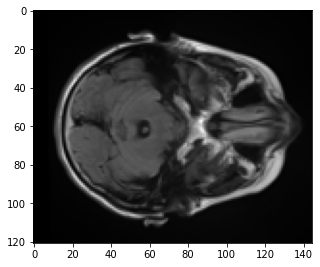

In [10]:
plt.figure(figsize=(5, 5))
file_name = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/code/5910978525-20090221-AX_FLAIR-13_flair_reg.nii.gz'
file = nib.load(file_name)
img = file.get_fdata()
print(img.shape)
plt.imshow(img[:,:,40], cmap='gray')
